# Algoritmo do Laboratório Nacional de Dados, visando fazer o parsing nos dados obtidos do DataSUS - Projeto Turing - Referente a Suícidios  
📄 Fonte dos dados (CSV):
https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/DO23OPEN.csv

📘 Dicionário de Dados (Data Dictionary):
https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral+-+Estrutura.pdf

Site Base dos dados:
https://opendatasus.saude.gov.br/dataset/sim/

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np

In [2]:
# Jogando o arquivo CSV para dentro do notebook
df = pd.read_csv(r"C:\Users\Kaue Mandarino\Downloads\DO23OPEN (1).csv") # Para o Python ler o endereço windows tem que por um "r" antes do caminho do arquivo   

In [3]:
# Exibindo as primeiras 3 linhas do dataframe para ver se deu certo:
df.head(3)

,"contador;""ORIGEM"";""TIPOBITO"";""DTOBITO"";""HORAOBITO"";""NATURAL"";""CODMUNNATU"";""DTNASC"";""IDADE"";""SEXO"";""RACACOR"";""ESTCIV"";""ESC"";""ESC2010"";""SERIESCFAL"";""OCUP"";""CODMUNRES"";""LOCOCOR"";""CODESTAB"";""CODMUNOCOR"";""IDADEMAE"";""ESCMAE"";""ESCMAE2010"";""SERIESCMAE"";""OCUPMAE"";""QTDFILVIVO"";""QTDFILMORT"";""GRAVIDEZ"";""SEMAGESTAC"";""GESTACAO"";""PARTO"";""OBITOPARTO"";""PESO"";""TPMORTEOCO"";""OBITOGRAV"";""OBITOPUERP"";""ASSISTMED"";""EXAME"";""CIRURGIA"";""NECROPSIA"";""LINHAA"";""LINHAB"";""LINHAC"";""LINHAD"";""LINHAII"";""CAUSABAS"";""CB_PRE"";""COMUNSVOIM"";""DTATESTADO"";""CIRCOBITO"";""ACIDTRAB"";""FONTE"";""NUMEROLOTE"";""DTINVESTIG"";""DTCADASTRO"";""ATESTANTE"";""STCODIFICA"";""CODIFICADO"";""VERSAOSIST"";""VERSAOSCB"";""FONTEINV"";""DTRECEBIM"";""ATESTADO"";""DTRECORIGA"";""OPOR_DO"";""CAUSAMAT"";""ESCMAEAGR1"";""ESCFALAGR1"";""STDOEPIDEM"";""STDONOVA"";""DIFDATA"";""NUDIASOBCO"";""DTCADINV"";""TPOBITOCOR"";""DTCONINV"";""FONTES"";""TPRESGINFO"";""TPNIVELINV"";""DTCADINF"";""MORTEPARTO"";""DTCONCASO"";""ALTCAUSA"";""CAUSABAS_O"";""TPPOS"";""TP_ALTERA"";""CB_ALT"""
0,"1;""1"";""2"";""14022023"";""0930"";""833"";""330270"";""10..."
1,"2;""1"";""2"";""14022023"";""1730"";""822"";""221110"";""12..."
2,"3;""1"";""2"";""14022023"";""0500"";""822"";""220790"";""10..."


Não deu certo porque a função de ler CSV imagina sozinha que o separador seja uma virgula, e por isso não converte,  
 no caso em questão o separador do arquivo é um ';" como podemos.  
contador;"ORIGEM";"TIPOBITO";"DTOBITO";

In [4]:
# Explicitando o separador como ponto e vírgula para a leitura correta do arquivo
df = pd.read_csv(r"C:\Users\Kaue Mandarino\Downloads\DO23OPEN (1).csv", sep=';')

C:\Users\Kaue Mandarino\AppData\Local\Temp\ipykernel_33920\1699433278.py:2: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Kaue Mandarino\Downloads\DO23OPEN (1).csv", sep=';')


Este warning: "DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False"  
quer dizer que o Python esta lendo coluna por coluna e atribuindo para cada uma um tipo, exemplo:  
Essa aqui é tipo numérico, essa é float, essa é texto...  
Mas para isso ele gasta memória, uma opção que consumiria menos processamento seria a gente olhar o arquivo original  
e especificar no parametro da funcão o tipo de cada coluna, opção mais viavél para arquivos mais pesados.

In [5]:
# Vamos exibir a cabeça do DataFrame para verificar se os dados foram carregados corretamente
df.head(3)

,contador,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
0,1,1,2,14022023,930.0,833.0,330270.0,10071954.0,468,1,...,NaN,NaN,NaN,NaN,NaN,NaN,I10,NaN,NaN,NaN
1,2,1,2,14022023,1730.0,822.0,221110.0,12091956.0,466,1,...,NaN,NaN,NaN,NaN,NaN,NaN,I678,NaN,NaN,NaN
2,3,1,2,14022023,500.0,822.0,220790.0,10011953.0,470,2,...,NaN,NaN,NaN,NaN,NaN,NaN,K750,NaN,NaN,NaN


Ok, uma vez carregado o dataframe vamos fazer o parsing (depara), tratando cada uma das 86 colunas numéricas para que fique em uma entrada mais palatável;  
Resumindo vamos desencripitar a Enigma rsrs.

In [6]:
# Removendo Coluna 'contador', uma vez que parece sujeira no DataFrame, creio que teria que ter usado o padrão reset_index() na importação  
# mas assim também funciona:
df = df.drop(columns=['contador'])
df.head(1)

,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
0,1,2,14022023,930.0,833.0,330270.0,10071954.0,468,1,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,I10,NaN,NaN,NaN


Agora vamos na sequencia direita para esquerda fazer o parser nas proximas uma a uma, são 86 o.o',  
A partir daqui precisamos estar com o dicionário em mãos:  
https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral+-+Estrutura.pdf

A primeira coluna é Origem:

Origem do registro. (1- Oracle; 2 - Banco estadual diponibilizado via FTP; 3 -
Banco SEADE; 9 - Ignorado)  
Indica o banco de dados origem, não vamos usar ela então:


In [7]:
df = df.drop(columns=['ORIGEM']) # Removendo a coluna 'ORIGEM' que não é necessária
df.head(1) # Exibindo a primeira linha do DataFrame para verificação

,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
0,2,14022023,930.0,833.0,330270.0,10071954.0,468,1,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,I10,NaN,NaN,NaN


A proxima coluna é TIPOOBITO:  
Tipo do óbito Óbito fetal: morte antes da expulsão ou da extração completa do   
corpo da Mãe, independentemente da duração da gravidez. Indica o óbito o  
fato de o feto, depois da expulsão do corpo materno, não respirar nem  
apresentar nenhum outro sinal de vida, como batimentos do coração,   
pulsações do cordão umbilical ou movimentos efetivos dos músculos de  
contração voluntária. (1-Fetal; 2-Não Fetal)  
Como trata de óbitos fetias não tem relação com nosso estudo (suicídio)  
Vamos tirar ela também:

Como pelo jeito vamos ficar repetindo esta remoção de colunas vou criar uma função para facilitar nossa vida:

In [8]:
def drop(col, df_name='df'):
    globals()[df_name] = globals()[df_name].drop(columns=[col])
    return globals()[df_name].head(1)

Agora ao inves de precisar digitar este codigo grande:  
df = df.drop(columns=['TIPOOBITO']) # Removendo a coluna 'ORIGEM' que não é necessária  
df.head(1) # Exibindo a primeira linha do DataFrame para verificação  
podemos digitar apenas:


In [9]:
drop('TIPOBITO')

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
0,14022023,930.0,833.0,330270.0,10071954.0,468,1,4.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,I10,NaN,NaN,NaN


A próxima coluna é DTOBITO (data do óbito), só de olhar já da ver que ela indica ddmmaaa, então vamos transformar ela no formato padrão de data do python:

In [10]:
df['DTOBITO'] = pd.to_datetime(df['DTOBITO'], format='%d%m%Y')

ValueError: day is out of range for month, at position 35. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

deu esse ValueError: day is out of range for month, at position 35.  
disse que a linha 35 esta com algum erro, vamos dar uma olhada nela:

In [11]:
df['DTOBITO'][35] # Exibindo a data de óbito da linha 35 para verificação

1072023

Ele deveria ser 01072023, mas perdeu o zero à esquerda.  
então antes de converter vamos preencher toda a coluna com 8 digitos  
utilizando a funcao zfill:

In [12]:
df['DTOBITO'] = (df['DTOBITO'].astype(str).str.zfill(8))
df['DTOBITO'][35] # Exibindo a data de óbito da linha 35 para verificação

'01072023'

In [13]:
# Uma vez tratados os zeros a esquerda, agora podemos converter para datetime
df['DTOBITO'] = pd.to_datetime(df['DTOBITO'], format='%d%m%Y')

Agora vamos ver se deu certo:  
Se retornar 0 → ✅ tudo certo  
Se > 0 → ⚠️ existem datas inválidas  

In [14]:
df['DTOBITO'].isna().sum()

0

🧠 O que significa isna()?  
isna() verifica se o valor está ausente / inválido.  
Em pandas, isso inclui:  
NaN → número ausente  
NaT → data inválida / ausente  
None → valor nulo  

In [15]:
# Vamos ainda dar mais uma olhada na coluna:
df['DTOBITO']

0         2023-02-14
1         2023-02-14
2         2023-02-14
3         2023-02-14
4         2023-02-14
             ...    
1465605   2023-11-30
1465606   2023-12-12
1465607   2023-12-22
1465608   2023-12-22
1465609   2023-12-31
Name: DTOBITO, Length: 1465610, dtype: datetime64[ns]

deu certo

In [16]:
df.head(1)

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
0,2023-02-14,930.0,833.0,330270.0,10071954.0,468,1,4.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,I10,NaN,NaN,NaN


A próxima coluna é HORAOBITO

In [17]:
df['HORAOBITO']

0           930.0
1          1730.0
2           500.0
3          2235.0
4           940.0
            ...  
1465605    2100.0
1465606    1220.0
1465607    1734.0
1465608    2030.0
1465609       NaN
Name: HORAOBITO, Length: 1465610, dtype: float64

Pelo jeito ela esta como decimal atoa, o ".0" (float) esta errado, ao que parece ela é inteiro e hhmm em um padrão de 24h  
vamos tratar

In [18]:
# Primeiro vamos remover o float:
df['HORAOBITO'] = df['HORAOBITO'].astype('int64')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

Nao funcionou porque a coluna tem algum valor NA, vamos ver:

In [19]:
df['HORAOBITO'].isna().sum()

49218

Para tratar isso basta colocar o parametro "errors='coerce' que ele manterá os NA

In [20]:
df['HORAOBITO'] = pd.to_datetime(df['HORAOBITO'], format='%H%M', errors='coerce').dt.time
df['HORAOBITO']
df.head(1)

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
0,2023-02-14,09:30:00,833.0,330270.0,10071954.0,468,1,4.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,I10,NaN,NaN,NaN


In [21]:
df.head(1)  # Exibindo as primeiras linhas do DataFrame para verificação

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
0,2023-02-14,09:30:00,833.0,330270.0,10071954.0,468,1,4.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,I10,NaN,NaN,NaN


Agora o desafio começa a ficar maior, vamos olhar a coluna "NATURAL", uma vez que não é tão intuitivo o que significa cada número,  
vamos consultar no dicionário, lá achei que esta coluna indica: 
  
"País e Unidade da Federação onde falecido nasceu. e estrangeiro informar
País. (Números) 1979 "  

Fui pesquisar na internet achei que o IBGE tem uma lista de código para os Estados>

https://www.ibge.gov.br/explica/codigos-dos-municipios.php


Vamos testar a hipótese de que seja a tabela a cima, nela temos que do estado de SP é 35,  
iremos agora dar uma olhada nos dados para ver se bate a maior incidência neste número.


In [22]:
df['NATURAL'].value_counts() # Essa função conta quantas vezes cada entrada única aparece na coluna 'NATURAL'

NATURAL
835.0    240480
831.0    195648
829.0    129836
843.0     99518
833.0     96494
          ...  
80.0          1
136.0         1
270.0         1
123.0         1
148.0         1
Name: count, Length: 163, dtype: int64

Podemos notar acima que existe uma maior incidência em número que começam com "8" e acabam com 35, 31, 29, 43  
Pela lista do IBGE 35 = SP, 31 = MG, 29 = BH e 43 = RS, segundo essa Tése o primeiro digito "8" seria = BR

Vamos tentar validar isto com pesquisa, segundo apurei na internet:
Aqui estão os principais estados em população (estimativas 2024-2025):  
São Paulo (SP): ~46 milhões.  
Minas Gerais (MG): ~21,3 milhões.  
Rio de Janeiro (RJ): ~17,2 milhões.  
Bahia (BA): ~14,8 milhões.  
Paraná (PR): ~11,8 milhões.  
Rio Grande do Sul (RS): ~11,2 milhões.   

Encontramos entre as maiores populações SP MG BG E RS nesta ordem, está na mesma ordem,  
Segundo a tese de que os códigos da tabelas seriam os mesmos do do IBGE,
mas neste caso deveriamos ter também RJ E PR entre os maiores,  
como contra prova vamos verificar: na tabela do IBGE  RJ = 41 e PR = 33, seria o equivalente a 841.0 e 833.0  
Se a tése estiver correta temos que ter grandes incidências desses dois números na nossa coluna

In [23]:
# total de registros (ignorando NaN)
total = df['NATURAL'].notna().sum()

# top 10 valores + percentual
top10 = (
    df['NATURAL']
    .value_counts()
    .head(10)
    .rename('qtd')
    .to_frame()
)

top10['perc_%'] = (top10['qtd'] / total * 100).round(2)

top10


,qtd,perc_%
NATURAL,,
835.0,240480,17.18
831.0,195648,13.98
829.0,129836,9.27
843.0,99518,7.11
833.0,96494,6.89
826.0,86386,6.17
823.0,74799,5.34
841.0,69710,4.98
842.0,44639,3.19


Tése validada com sucesso os números são referentes a lista de Municípios do IBGE e o oito a esquerda é = Brasil

In [24]:
# Para começar a fazer depara, vamos tirar o ".0" dos valores da coluna 'NATURAL', tratando como inteiro:
df['NATURAL'] = df['NATURAL'].astype('int64')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

Deu erro, a conversão para inteiro, não aceita valores nulos,   
então vamos usar a funcao pd.to_numeric e colocar o parâmetro erros='coerce' 
este parâmetro vai converter e se der erro ele retorna "NaN"

In [25]:
df['NATURAL'] = (pd.to_numeric(df['NATURAL'], errors='coerce').astype('Int64'))
df['NATURAL'].value_counts().head(10)

NATURAL
835    240480
831    195648
829    129836
843     99518
833     96494
826     86386
823     74799
841     69710
842     44639
821     44195
Name: count, dtype: Int64

In [26]:
# Criei este código abaixo com ajuda da IA para fazer o de/para dos códigos das unidades federativas brasileiras
uf_map = {
    11: "Rondônia",
    12: "Acre",
    13: "Amazonas",
    14: "Roraima",
    15: "Pará",
    16: "Amapá",
    17: "Tocantins",
    21: "Maranhão",
    22: "Piauí",
    23: "Ceará",
    24: "Rio Grande do Norte",
    25: "Paraíba",
    26: "Pernambuco",
    27: "Alagoas",
    28: "Sergipe",
    29: "Bahia",
    31: "Minas Gerais",
    32: "Espírito Santo",
    33: "Rio de Janeiro",
    35: "São Paulo",
    41: "Paraná",
    42: "Santa Catarina",
    43: "Rio Grande do Sul",
    50: "Mato Grosso do Sul",
    51: "Mato Grosso",
    52: "Goiás",
    53: "Distrito Federal"
}

df['NATURAL'] = (
    df['NATURAL']
    .where(df['NATURAL'].between(800, 899))  # só Brasil
    .mod(100)                               # últimos 2 dígitos
    .map(uf_map)                            # de/para UF
    .fillna('Estrangeiro')                  # o que não converte
)

df['NATURAL'].value_counts().head(10)


NATURAL
São Paulo            240480
Minas Gerais         195648
Bahia                129836
Rio Grande do Sul     99518
Rio de Janeiro        96494
Pernambuco            86386
Estrangeiro           84026
Ceará                 74799
Paraná                69710
Santa Catarina        44639
Name: count, dtype: int64

In [27]:
df.head(10)

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
0,2023-02-14,09:30:00,Rio de Janeiro,330270.0,10071954.0,468,1,4.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,I10,NaN,NaN,NaN
1,2023-02-14,17:30:00,Piauí,221110.0,12091956.0,466,1,4.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,I678,NaN,NaN,NaN
2,2023-02-14,05:00:00,Piauí,220790.0,10011953.0,470,2,NaN,3.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,K750,NaN,NaN,NaN
3,2023-02-14,22:35:00,Ceará,231180.0,15121943.0,479,2,1.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,I64,S,NaN,NaN
4,2023-02-14,09:40:00,Paraná,411350.0,9041973.0,449,2,4.0,1.0,1.0,...,NaN,M,NaN,NaN,NaN,NaN,C189,S,NaN,NaN
5,2023-02-14,09:06:00,São Paulo,355330.0,14091947.0,475,1,1.0,1.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,W188,S,NaN,NaN
6,2023-02-14,12:02:00,Ceará,230760.0,13051930.0,492,1,1.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E86,S,NaN,NaN
7,2023-02-14,02:42:00,Pernambuco,260190.0,1071984.0,438,2,1.0,1.0,4.0,...,NaN,M,NaN,NaN,NaN,NaN,C539,NaN,NaN,NaN
8,2023-02-14,20:41:00,Bahia,291370.0,5051936.0,486,2,1.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,C729,NaN,NaN,NaN
9,2023-02-14,20:24:00,Rio Grande do Sul,431490.0,26021981.0,441,2,1.0,1.0,9.0,...,NaN,M,NaN,NaN,NaN,NaN,X700,S,NaN,NaN


Agora vamos converter a coluna 'CODMUNNATU', dedutivelmente Código do Município de Naturalidade (municípios),  
já segundo a mesma fonte, deve ser o código do IBGE,  
como contraprova vamos verificar os estados.

A lista do Ibge tem 5572 municípios, não da para explicitar direto no código com IA, como fiz com os estados, então:  
Copiei a lista manualmente colei no EXCEL, retirei os cabeçalhos duplicados, e criei um arquivo EXCEL que vou pegar abaixo:

In [28]:
codigomun = pd.read_excel(r"C:\Users\Kaue Mandarino\Desktop\Mestrado\degrees\Projeto-Turin\Arquivos de apoio\Códigos de Municípios IBGE.xlsx")
codigomun # SIC

,Munícipio,Códigos
0,AAcrelândia,1200013
1,Assis Brasil,1200054
2,BBrasiléia,1200104
3,Bujari,1200138
4,CCapixaba,1200179
...,...,...
5566,Tocantinópolis,1721208
5567,Tupirama,1721257
5568,Tupiratins,1721307
5569,WWanderlândia,1722081


Vemos que a tabela precisa de tratamento, porque o primeiro municipio de cada letra veio com o nome errado,  
Olhar a foto a seguir para entender o motivo:  
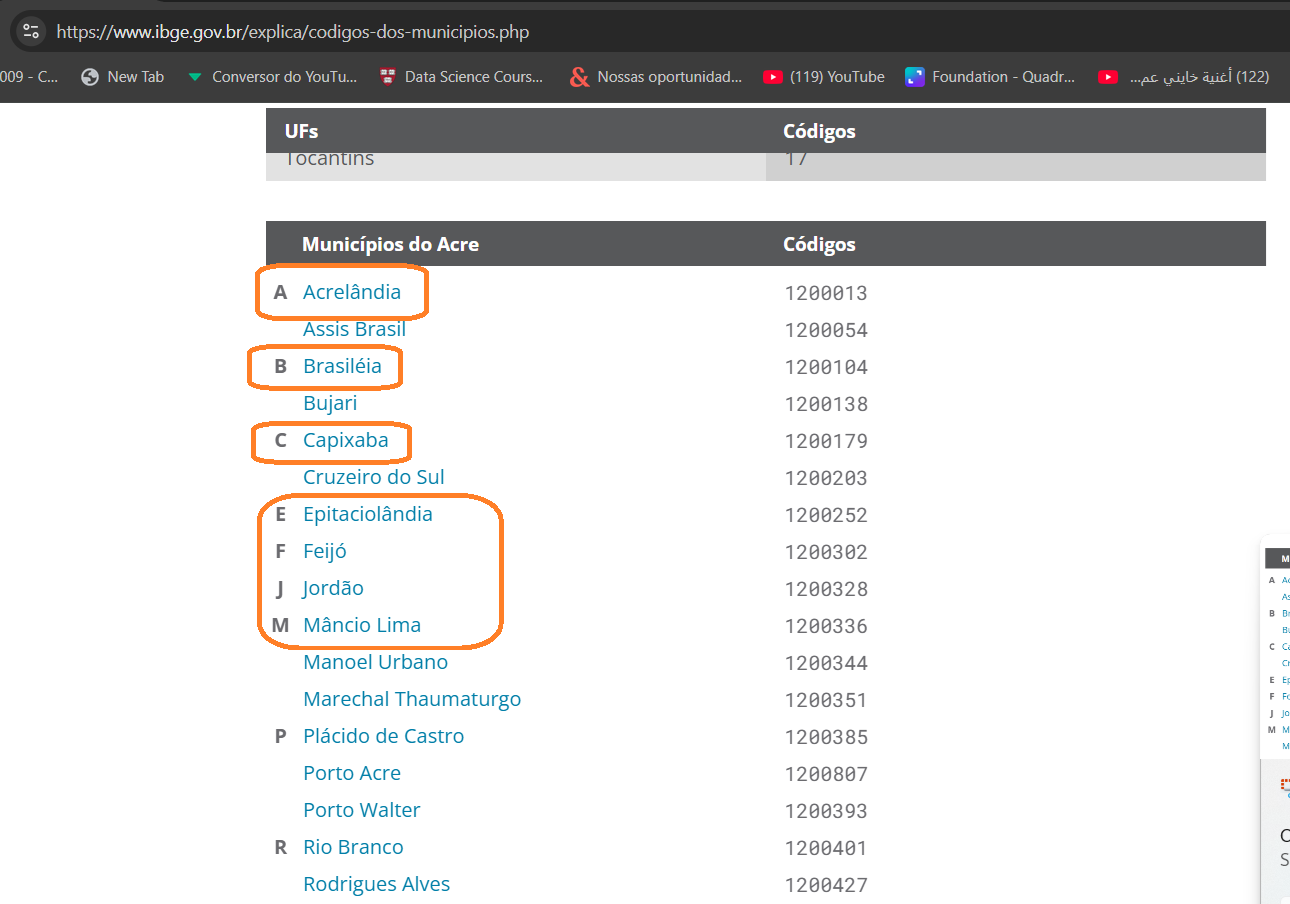

Vamos usar a função REGEX para achar todas as entradas que tiverem as duas primeiras letras maiúsculas e remover a primeira delas

^ → início da string

([A-Z])([A-Z]) → duas letras maiúsculas seguidas

\2 → mantém apenas a segunda letra


In [29]:
codigomun['Munícipio'] = codigomun['Munícipio'].str.replace(r'^([A-Z])([A-Z])', r'\2', regex=True)
codigomun['Códigos']

0       1200013
1       1200054
2       1200104
3       1200138
4       1200179
         ...   
5566    1721208
5567    1721257
5568    1721307
5569    1722081
5570    1722107
Name: Códigos, Length: 5571, dtype: int64

Olhando a tabela de códigos dos municipios vi que eles estão trazendo um último digito a mais, do que deveria, vou remover

In [30]:
codigomun['Códigos'] = codigomun['Códigos'] // 10
codigomun['Códigos'].head(3)

0    120001
1    120005
2    120010
Name: Códigos, dtype: int64

Agora sim vamos fazer o depara, cruzando os dados da tabela que subimos com o nosso conjunto do DATASUS,  
convertendo tudo que é codigo por nome do município

In [31]:
df['CODMUNNATU'] = df['CODMUNNATU'].map(codigomun.set_index('Códigos')['Munícipio'])
df

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
0,2023-02-14,09:30:00,Rio de Janeiro,Maricá,10071954.0,468,1,4.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,I10,NaN,NaN,NaN
1,2023-02-14,17:30:00,Piauí,União,12091956.0,466,1,4.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,I678,NaN,NaN,NaN
2,2023-02-14,05:00:00,Piauí,Pedro II,10011953.0,470,2,NaN,3.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,K750,NaN,NaN,NaN
3,2023-02-14,22:35:00,Ceará,Russas,15121943.0,479,2,1.0,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,I64,S,NaN,NaN
4,2023-02-14,09:40:00,Paraná,Loanda,9041973.0,449,2,4.0,1.0,1.0,...,NaN,M,NaN,NaN,NaN,NaN,C189,S,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465605,2023-11-30,21:00:00,Amapá,Oiapoque,1042023.0,307,1,5.0,NaN,NaN,...,NaN,NaN,10062024.0,3.0,26052024.0,2.0,NaN,NaN,NaN,NaN
1465606,2023-12-12,12:20:00,Pará,Altamira,23101987.0,436,1,5.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1465607,2023-12-22,17:34:00,Pará,Altamira,5112023.0,301,1,5.0,NaN,NaN,...,NaN,NaN,15042024.0,3.0,20032024.0,1.0,NaN,NaN,NaN,NaN
1465608,2023-12-22,20:30:00,Amazonas,Eirunepé,1012008.0,415,2,5.0,NaN,1.0,...,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Conferindo o nome dos municípios vs Estado, deu certo

Agora vamos para 'DTNASC' vamos tentar a mesma abordagem que usamos para 'DTOBITO'

In [32]:
df['DTNASC'] = (
    df['DTNASC']
        .astype(str)                              # garante string
        .str.replace(r'\.0$', '', regex=True)     # remove .0 final
        .str.zfill(8)                             # completa com zeros à esquerda
)

df['DTNASC'] = pd.to_datetime(
    df['DTNASC'],
    format='%d%m%Y',
    errors='coerce'                               # inválidos viram NaT
)

df['DTNASC'].head(10)


0   1954-07-10
1   1956-09-12
2   1953-01-10
3   1943-12-15
4   1973-04-09
5   1947-09-14
6   1930-05-13
7   1984-07-01
8   1936-05-05
9   1981-02-26
Name: DTNASC, dtype: datetime64[ns]

Dessa vez foi mais fácil, proxima coluna é a IDADE, temos que:

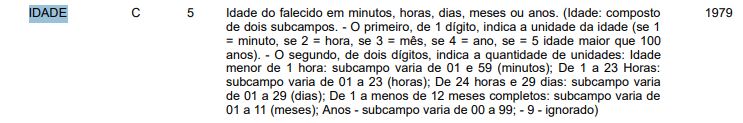

In [33]:
df['IDADE']

0          468
1          466
2          470
3          479
4          449
          ... 
1465605    307
1465606    436
1465607    301
1465608    415
1465609    214
Name: IDADE, Length: 1465610, dtype: int64

Como podemos notar acima a linha 1465609 é '214',  
onde 2 representa a medida 'Horas' e 14 o tempo de vida,  
neste ponto notei algo interessante, provavelmente trata-se da uma fatalidade não suicídio,
então lembrei que esta base traz todas as mortes, vou filtrar apenas os suicídios, para ficar mais fácil.  

Temos que: ,  
  
  
Então vamos filtrar apenas as linhas em que df['CIRCOBITO] = '2' 

In [34]:
df = df[df['CIRCOBITO'] == 2]
df

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
9,2023-02-14,20:24:00,Rio Grande do Sul,Porto Alegre,1981-02-26,441,2,1.0,1.0,9.0,...,NaN,M,NaN,NaN,NaN,NaN,X700,S,NaN,NaN
102,2023-01-01,NaT,Santa Catarina,Florianópolis,1982-05-09,440,2,1.0,1.0,5.0,...,NaN,M,NaN,NaN,NaN,NaN,X804,S,NaN,NaN
160,2023-01-01,NaT,Estrangeiro,NaN,1990-11-29,432,2,1.0,1.0,3.0,...,NaN,M,NaN,NaN,NaN,NaN,X689,S,NaN,NaN
184,2023-01-01,NaT,Rio Grande do Sul,Sobradinho,1962-12-07,460,1,1.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,X804,N,NaN,NaN
185,2023-01-01,NaT,Rio Grande do Sul,Venâncio Aires,1991-01-15,431,1,1.0,1.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,X704,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465530,2023-11-18,NaT,Minas Gerais,Santo Antônio do Rio Abaixo,1970-08-15,453,1,4.0,9.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1465589,2023-09-27,20:00:00,Amapá,Pedra Branca do Amapari,2005-03-26,418,1,5.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1465595,2023-11-01,19:00:00,Amazonas,Eirunepé,2011-01-01,412,2,5.0,NaN,9.0,...,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1465603,2023-11-26,15:40:00,Amazonas,Eirunepé,2002-01-01,421,2,5.0,NaN,1.0,...,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Vamos verificar agora novamente as idade
df['IDADE'].value_counts().head(100)

IDADE
426    386
427    376
441    375
428    368
435    365
      ... 
491      4
495      2
500      1
506      1
501      1
Name: count, Length: 90, dtype: int64

In [36]:
idade_str = df.loc[:, 'IDADE'].astype(str).str.zfill(3)

unidade_idade = idade_str.str[0].astype(int)
valor_idade   = idade_str.str[1:3].astype(int)

df.loc[:, 'IDADE'] = np.select(
    [
        unidade_idade == 1,  # minutos
        unidade_idade == 2,  # horas
        unidade_idade == 3,  # dias
        unidade_idade == 4,  # anos
        unidade_idade == 5   # >100 anos
    ],
    [
        valor_idade / (60 * 24 * 365),
        valor_idade / (24 * 365),
        valor_idade / 365,
        valor_idade,
        100
    ],
    default=np.nan
)

In [37]:
df.head(5)

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
9,2023-02-14,20:24:00,Rio Grande do Sul,Porto Alegre,1981-02-26,41.0,2,1.0,1.0,9.0,...,NaN,M,NaN,NaN,NaN,NaN,X700,S,NaN,NaN
102,2023-01-01,NaT,Santa Catarina,Florianópolis,1982-05-09,40.0,2,1.0,1.0,5.0,...,NaN,M,NaN,NaN,NaN,NaN,X804,S,NaN,NaN
160,2023-01-01,NaT,Estrangeiro,NaN,1990-11-29,32.0,2,1.0,1.0,3.0,...,NaN,M,NaN,NaN,NaN,NaN,X689,S,NaN,NaN
184,2023-01-01,NaT,Rio Grande do Sul,Sobradinho,1962-12-07,60.0,1,1.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,X804,N,NaN,NaN
185,2023-01-01,NaT,Rio Grande do Sul,Venâncio Aires,1991-01-15,31.0,1,1.0,1.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,X704,N,NaN,NaN


In [38]:
df.loc[:, 'IDADE'] = df['IDADE'].astype('Int64')
df.head(1)

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
9,2023-02-14,20:24:00,Rio Grande do Sul,Porto Alegre,1981-02-26,41,2,1.0,1.0,9.0,...,NaN,M,NaN,NaN,NaN,NaN,X700,S,NaN,NaN


Só por questão de Curiosidade vamos dar uma olhada analitica nas idade:

In [39]:
df['IDADE'].describe()

count      16242.0
mean      42.28808
std      17.124579
min           10.0
25%           28.0
50%           40.0
75%           54.0
max          100.0
Name: IDADE, dtype: Float64

Distribuição de idade dos óbitos por suicídio

A análise considera 16.242 registros com idade válida.

Idade média: ~42 anos

Mediana: 40 anos
→ metade dos casos ocorre até os 40 anos

Faixa interquartil (25%–75%): 28 a 54 anos
→ concentração principal em adultos jovens e meia-idade

Idade mínima analisada: 10 anos

Idade máxima: 100 anos

Interpretação-chave
Os dados indicam que os óbitos por suicídio não se concentram apenas em idosos, mas afetam de forma significativa adultos em idade produtiva, com um pico entre o final da juventude e a meia-idade. Isso reforça a necessidade de políticas de prevenção focadas em saúde mental ao longo da vida adulta, especialmente entre 20 e 60 anos.

Se quiser, no próximo passo posso:

Em seguida, para a coluna SEXO temos:  
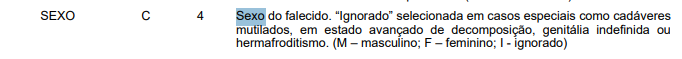

In [40]:
df.loc[:, 'SEXO'] = (
    df['SEXO']
    .map({1: 'Masculino', 2: 'Feminino', 0: 'Ignorado'})
    .fillna('Ignorado')
)
df.head(1)

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
9,2023-02-14,20:24:00,Rio Grande do Sul,Porto Alegre,1981-02-26,41,Feminino,1.0,1.0,9.0,...,NaN,M,NaN,NaN,NaN,NaN,X700,S,NaN,NaN


Para RACACOR temos que:
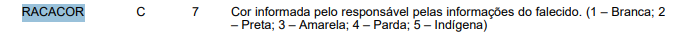

In [41]:
df.loc[:, 'RACACOR'] = (
    df['RACACOR']
    .map({
        1: 'Branca',
        2: 'Preta',
        3: 'Amarela',
        4: 'Parda',
        5: 'Indígena'
    })
    .fillna('Ignorado')
)
df.head(1)

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
9,2023-02-14,20:24:00,Rio Grande do Sul,Porto Alegre,1981-02-26,41,Feminino,Branca,1.0,9.0,...,NaN,M,NaN,NaN,NaN,NaN,X700,S,NaN,NaN


Para ESC temos:
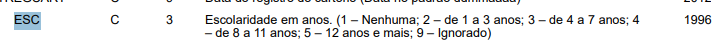

In [42]:
df.loc[:, 'ESC'] = (
    df['ESC']
    .map({
        1: 'Nenhuma',
        2: '1 a 3 anos',
        3: '4 a 7 anos',
        4: '8 a 11 anos',
        5: '12 anos ou mais'
    })
    .fillna('Ignorado')
)


Para ESTCIV	Temos:
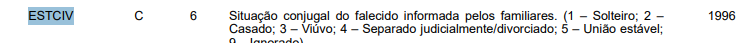

In [43]:
df.loc[:, 'ESTCIV'] = (
    df['ESTCIV']
    .map({
        1: 'Solteiro',
        2: 'Casado',
        3: 'Viúvo',
        4: 'Separado/Divorciado',
        5: 'União estável'
    })
    .fillna('Ignorado')
)
df.head(1)

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
9,2023-02-14,20:24:00,Rio Grande do Sul,Porto Alegre,1981-02-26,41,Feminino,Branca,Solteiro,Ignorado,...,NaN,M,NaN,NaN,NaN,NaN,X700,S,NaN,NaN


In [44]:
# Agora vamos ver as outras colunas:
df.columns

Index(['DTOBITO', 'HORAOBITO', 'NATURAL', 'CODMUNNATU', 'DTNASC', 'IDADE',
       'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'ESC2010', 'SERIESCFAL', 'OCUP',
       'CODMUNRES', 'LOCOCOR', 'CODESTAB', 'CODMUNOCOR', 'IDADEMAE', 'ESCMAE',
       'ESCMAE2010', 'SERIESCMAE', 'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT',
       'GRAVIDEZ', 'SEMAGESTAC', 'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO',
       'TPMORTEOCO', 'OBITOGRAV', 'OBITOPUERP', 'ASSISTMED', 'EXAME',
       'CIRURGIA', 'NECROPSIA', 'LINHAA', 'LINHAB', 'LINHAC', 'LINHAD',
       'LINHAII', 'CAUSABAS', 'CB_PRE', 'COMUNSVOIM', 'DTATESTADO',
       'CIRCOBITO', 'ACIDTRAB', 'FONTE', 'NUMEROLOTE', 'DTINVESTIG',
       'DTCADASTRO', 'ATESTANTE', 'STCODIFICA', 'CODIFICADO', 'VERSAOSIST',
       'VERSAOSCB', 'FONTEINV', 'DTRECEBIM', 'ATESTADO', 'DTRECORIGA',
       'OPOR_DO', 'CAUSAMAT', 'ESCMAEAGR1', 'ESCFALAGR1', 'STDOEPIDEM',
       'STDONOVA', 'DIFDATA', 'NUDIASOBCO', 'DTCADINV', 'TPOBITOCOR',
       'DTCONINV', 'FONTES', 'TPRESGINFO', 'TPNIVELI

In [45]:
df.head(100)

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
9,2023-02-14,20:24:00,Rio Grande do Sul,Porto Alegre,1981-02-26,41,Feminino,Branca,Solteiro,Ignorado,...,NaN,M,NaN,NaN,NaN,NaN,X700,S,NaN,NaN
102,2023-01-01,NaT,Santa Catarina,Florianópolis,1982-05-09,40,Feminino,Branca,Solteiro,12 anos ou mais,...,NaN,M,NaN,NaN,NaN,NaN,X804,S,NaN,NaN
160,2023-01-01,NaT,Estrangeiro,NaN,1990-11-29,32,Feminino,Branca,Solteiro,4 a 7 anos,...,NaN,M,NaN,NaN,NaN,NaN,X689,S,NaN,NaN
184,2023-01-01,NaT,Rio Grande do Sul,Sobradinho,1962-12-07,60,Masculino,Branca,Solteiro,4 a 7 anos,...,NaN,NaN,NaN,NaN,NaN,NaN,X804,N,NaN,NaN
185,2023-01-01,NaT,Rio Grande do Sul,Venâncio Aires,1991-01-15,31,Masculino,Branca,Solteiro,Ignorado,...,NaN,NaN,NaN,NaN,NaN,NaN,X704,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5880,2023-01-02,NaT,Pernambuco,Jaboatão dos Guararapes,1996-07-19,26,Feminino,Branca,Solteiro,12 anos ou mais,...,NaN,M,NaN,NaN,NaN,NaN,X700,S,NaN,NaN
5924,2023-01-02,17:00:00,Goiás,Anápolis,1990-07-13,32,Masculino,Branca,Solteiro,12 anos ou mais,...,NaN,NaN,NaN,NaN,NaN,NaN,X700,N,NaN,NaN
5975,2023-01-02,05:00:00,Pernambuco,Garanhuns,1972-09-27,50,Masculino,Parda,Casado,4 a 7 anos,...,NaN,NaN,NaN,NaN,NaN,NaN,R99,S,NaN,NaN
5981,2023-01-02,15:36:00,Paraná,Curitiba,1993-02-13,29,Masculino,Branca,União estável,8 a 11 anos,...,NaN,NaN,NaN,NaN,NaN,NaN,Y200,S,NaN,NaN


In [46]:
df['RACACOR'].describe() # Apenas Curiosidade

count      16259
unique         6
top       Branca
freq        7581
Name: RACACOR, dtype: object

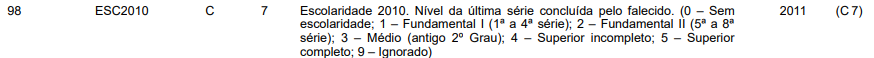

In [47]:
df.loc[:, 'ESC2010'] = (
    df['ESC2010']
    .map({
        0: 'Sem escolaridade',
        1: 'Fundamental I (1ª a 4ª série)',
        2: 'Fundamental II (5ª a 8ª série)',
        3: 'Ensino Médio',
        4: 'Superior incompleto',
        5: 'Superior completo'
    })
    .fillna('Ignorado')
)


In [48]:
df['ESC2010']

9                                Ignorado
102                     Superior completo
160        Fundamental II (5ª a 8ª série)
184         Fundamental I (1ª a 4ª série)
185                              Ignorado
                        ...              
1465530                  Sem escolaridade
1465589    Fundamental II (5ª a 8ª série)
1465595                          Ignorado
1465603                  Sem escolaridade
1465608                  Sem escolaridade
Name: ESC2010, Length: 16259, dtype: object

In [49]:
df.loc[:, 'SERIESCFAL'] = (
    df['SERIESCFAL']
    .map({
        1: '1ª série',
        2: '2ª série',
        3: '3ª série',
        4: '4ª série',
        5: '5ª série',
        6: '6ª série',
        7: '7ª série',
        8: '8ª série'
    })
    .fillna('Ignorado')
)
df['SERIESCFAL'].head(10)

9      Ignorado
102    Ignorado
160    Ignorado
184    4ª série
185    Ignorado
338    Ignorado
351    3ª série
353    Ignorado
378    Ignorado
412    3ª série
Name: SERIESCFAL, dtype: object

In [50]:
df.columns

Index(['DTOBITO', 'HORAOBITO', 'NATURAL', 'CODMUNNATU', 'DTNASC', 'IDADE',
       'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'ESC2010', 'SERIESCFAL', 'OCUP',
       'CODMUNRES', 'LOCOCOR', 'CODESTAB', 'CODMUNOCOR', 'IDADEMAE', 'ESCMAE',
       'ESCMAE2010', 'SERIESCMAE', 'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT',
       'GRAVIDEZ', 'SEMAGESTAC', 'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO',
       'TPMORTEOCO', 'OBITOGRAV', 'OBITOPUERP', 'ASSISTMED', 'EXAME',
       'CIRURGIA', 'NECROPSIA', 'LINHAA', 'LINHAB', 'LINHAC', 'LINHAD',
       'LINHAII', 'CAUSABAS', 'CB_PRE', 'COMUNSVOIM', 'DTATESTADO',
       'CIRCOBITO', 'ACIDTRAB', 'FONTE', 'NUMEROLOTE', 'DTINVESTIG',
       'DTCADASTRO', 'ATESTANTE', 'STCODIFICA', 'CODIFICADO', 'VERSAOSIST',
       'VERSAOSCB', 'FONTEINV', 'DTRECEBIM', 'ATESTADO', 'DTRECORIGA',
       'OPOR_DO', 'CAUSAMAT', 'ESCMAEAGR1', 'ESCFALAGR1', 'STDOEPIDEM',
       'STDONOVA', 'DIFDATA', 'NUDIASOBCO', 'DTCADINV', 'TPOBITOCOR',
       'DTCONINV', 'FONTES', 'TPRESGINFO', 'TPNIVELI

Agora chegamos em um mais difícil:  
 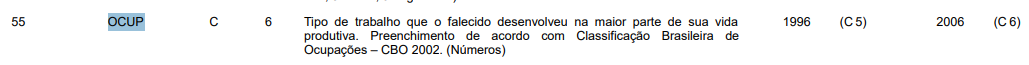  
Não temos os códigos no dicionário, ao dar um Google em 'CBO 2002' temos:

## CBO 2002 — Classificação Brasileira de Ocupações

A **CBO 2002 (Classificação Brasileira de Ocupações)** é o documento oficial que **nomeia, codifica e descreve as profissões** existentes no mercado de trabalho brasileiro.  
Foi instituída pela **Portaria nº 397, de 9 de outubro de 2002**, substituindo a versão anterior de 1994.

Essa versão trouxe uma estrutura mais enxuta e atualizada, composta por aproximadamente:

- **596 famílias ocupacionais** (grupos de base)
- **2.422 ocupações**
- **7.258 títulos sinônimos**

---

### 🔹 Características principais da CBO 2002

**Finalidade**  
Identificação e padronização das ocupações em registros:
- Administrativos (RAIS, CAGED)
- Domiciliares (PNAD, Censo)

**Estrutura**  
Baseada na **CIUO-88 (Classificação Internacional Uniforme de Ocupações)**, organizada em:
- 10 grandes grupos  
- 47 subgrupos principais  
- 192 subgrupos  
- 596 grupos de base  

**Atualização conceitual**  
Introduziu o conceito de **famílias ocupacionais**, refletindo transformações e modernizações do mercado de trabalho brasileiro.

**Uso obrigatório**  
O uso dos **códigos da CBO 2002** é obrigatório no preenchimento de documentos trabalhistas, como a **Carteira de Trabalho**.

**Limitação**  
A CBO **não regulamenta profissões** (isso é feito por legislação específica).  
Ela se limita a **descrever atividades e ocupações** existentes no mercado de trabalho.


Achei o CSV em : https://www.gov.br/trabalho-e-emprego/pt-br/assuntos/cbo/servicos/downloads/downloads  
https://www.gov.br/trabalho-e-emprego/pt-br/assuntos/cbo/servicos/downloads/cbo2002-ocupacao.csv

In [51]:
# Então vamos ler o csv, diretamente da url:

In [52]:
cb02002 = pd.read_csv('https://www.gov.br/trabalho-e-emprego/pt-br/assuntos/cbo/servicos/downloads/cbo2002-ocupacao.csv')
cbo2002

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 45: invalid continuation byte

Aqui ele deu erro no decode, em vermelho: 
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 45: invalid continuation byte  
É porque este enconde é padrao internacional, e costuma travar quando temos palavras com acentuação em português,  
Por exemplo "Ç", então temos que especificar um enconde diferente, vamos tentar o 'latim1'

In [53]:
cbo2002 = pd.read_csv('https://www.gov.br/trabalho-e-emprego/pt-br/assuntos/cbo/servicos/downloads/cbo2002-ocupacao.csv', encoding='latin1')
cbo2002

ParserError: Error tokenizing data. C error: Expected 1 fields in line 73, saw 2


Agora mudou o erro, ParserError: Error tokenizing data. C error: Expected 1 fields in line 73, saw 2,  
Isso quer dizer que o encoding deu certo, mas quando ele vai procurar 1 campo por linha (separado padrao por virgula),  
na linha 73 ele achou dois campos, isso quer dizer que na mesma linha tem duas virgulas;
É um indicativo que a virgula esta sendo usado para seu uso normal (separar palavras na lingua normal), e não como  
o separador do CSV. Sendo assim o separador deve ser outro vamos tentar como antes o ';' (isso é bem comum de acontecer)

In [54]:
cbo2002 = pd.read_csv('https://www.gov.br/trabalho-e-emprego/pt-br/assuntos/cbo/servicos/downloads/cbo2002-ocupacao.csv', encoding='latin1', sep=';')
cbo2002

,CODIGO,TITULO
0,10105,Oficial general da aeronáutica
1,10110,Oficial general do exército
2,10115,Oficial general da marinha
3,10205,Oficial da aeronáutica
4,10210,Oficial do exército
...,...,...
2689,992205,Encarregado geral de operações de conservação ...
2690,992210,Encarregado de equipe de conservação de vias p...
2691,992215,Operador de ceifadeira na conservação de vias ...
2692,992220,Pedreiro de conservação de vias permanentes (e...


Só de olhar acima já vemos que existem códigos de 5 e 6 digitos, desconfio que todos seriam de 6 digitos,   
mas o zero a esquerda deve estar sendo omitido.    
Então vamos ler o csv denovo, mas pedir que na leitura o PANDAR não salve os dados como número int64,   
vamos pedir para que salve como texto str, porque ao contrário de número o formato texto não come o 0 à esquerda. 

In [55]:
cbo2002 = pd.read_csv('https://www.gov.br/trabalho-e-emprego/pt-br/assuntos/cbo/servicos/downloads/cbo2002-ocupacao.csv', encoding='latin1', sep=';', dtype={"CODIGO": str})
cbo2002

,CODIGO,TITULO
0,010105,Oficial general da aeronáutica
1,010110,Oficial general do exército
2,010115,Oficial general da marinha
3,010205,Oficial da aeronáutica
4,010210,Oficial do exército
...,...,...
2689,992205,Encarregado geral de operações de conservação ...
2690,992210,Encarregado de equipe de conservação de vias p...
2691,992215,Operador de ceifadeira na conservação de vias ...
2692,992220,Pedreiro de conservação de vias permanentes (e...


Ai nos resta o desafio de no df não termos convertido a coluna ocup como texto originalmente,  
O mais fácil seria voltar lá em cima na importação e definir como texto, porém isso quebraria  
nosso storytelling, para fins didáticos do laboratório vamos usar a função zfill novamente:  

In [56]:
df['OCUP'] # Só confirmando o problema na coluna

9          512105.0
102        231210.0
160        422105.0
184             NaN
185             NaN
             ...   
1465530    623115.0
1465589         NaN
1465595         NaN
1465603         NaN
1465608         NaN
Name: OCUP, Length: 16259, dtype: float64

Aqui ainda pior, além de vir sem o zero à esquerda veio como float.

In [57]:
df['OCUP'] = pd.to_numeric(df['OCUP'], errors='coerce').astype('Int64') # Convertendo de número racional (float), para inteiro pandas (int64)
df['OCUP']

C:\Users\Kaue Mandarino\AppData\Local\Temp\ipykernel_33920\3248613997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OCUP'] = pd.to_numeric(df['OCUP'], errors='coerce').astype('Int64') # Convertendo de número racional (float), para inteiro pandas (int64)


9          512105
102        231210
160        422105
184          <NA>
185          <NA>
            ...  
1465530    623115
1465589      <NA>
1465595      <NA>
1465603      <NA>
1465608      <NA>
Name: OCUP, Length: 16259, dtype: Int64

In [58]:
df['OCUP'] = df.loc[:, 'OCUP'].astype(str).str.zfill(6) # Transformando todos em 6 digitos (0 a esquerda quando for 5)
df['OCUP'] 

C:\Users\Kaue Mandarino\AppData\Local\Temp\ipykernel_33920\1960680030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OCUP'] = df.loc[:, 'OCUP'].astype(str).str.zfill(6) # Transformando todos em 6 digitos (0 a esquerda quando for 5)


9          512105
102        231210
160        422105
184        00<NA>
185        00<NA>
            ...  
1465530    623115
1465589    00<NA>
1465595    00<NA>
1465603    00<NA>
1465608    00<NA>
Name: OCUP, Length: 16259, dtype: object

Uma vez com o df cb2002['CODIGO'] e df['OCUP'] no mesmo padrão podemos converter,  
igual fizemos com os códigos dos municípios

In [59]:
# df['CODMUNNATU'] = df['CODMUNNATU'].map(codigomun.set_index('Códigos')['Munícipio'])
df['OCUP'] = df['OCUP'].map(cbo2002.set_index('CODIGO')['TITULO'])
df['OCUP'].head(3)

C:\Users\Kaue Mandarino\AppData\Local\Temp\ipykernel_33920\1244966883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OCUP'] = df['OCUP'].map(cbo2002.set_index('CODIGO')['TITULO'])


9              Empregado  doméstico  nos serviços gerais
102    Professor de nível superior do ensino fundamen...
160                              Recepcionista, em geral
Name: OCUP, dtype: object

Contra prova, consultando direto no CSV:  
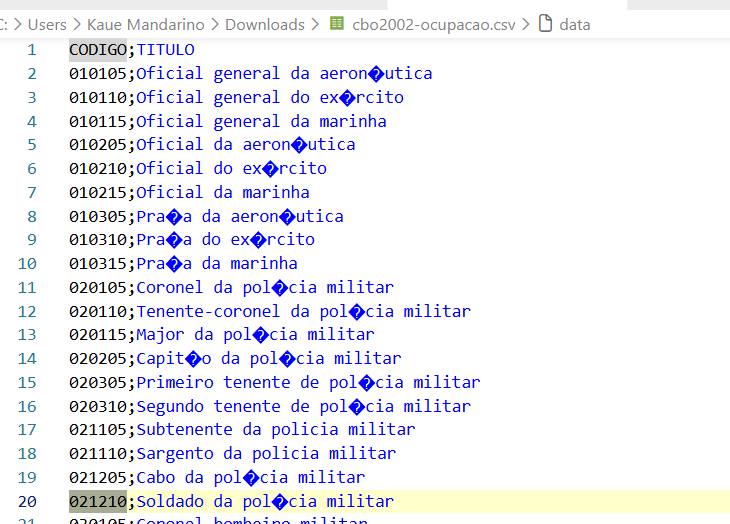

In [60]:
df.columns

Index(['DTOBITO', 'HORAOBITO', 'NATURAL', 'CODMUNNATU', 'DTNASC', 'IDADE',
       'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'ESC2010', 'SERIESCFAL', 'OCUP',
       'CODMUNRES', 'LOCOCOR', 'CODESTAB', 'CODMUNOCOR', 'IDADEMAE', 'ESCMAE',
       'ESCMAE2010', 'SERIESCMAE', 'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT',
       'GRAVIDEZ', 'SEMAGESTAC', 'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO',
       'TPMORTEOCO', 'OBITOGRAV', 'OBITOPUERP', 'ASSISTMED', 'EXAME',
       'CIRURGIA', 'NECROPSIA', 'LINHAA', 'LINHAB', 'LINHAC', 'LINHAD',
       'LINHAII', 'CAUSABAS', 'CB_PRE', 'COMUNSVOIM', 'DTATESTADO',
       'CIRCOBITO', 'ACIDTRAB', 'FONTE', 'NUMEROLOTE', 'DTINVESTIG',
       'DTCADASTRO', 'ATESTANTE', 'STCODIFICA', 'CODIFICADO', 'VERSAOSIST',
       'VERSAOSCB', 'FONTEINV', 'DTRECEBIM', 'ATESTADO', 'DTRECORIGA',
       'OPOR_DO', 'CAUSAMAT', 'ESCMAEAGR1', 'ESCFALAGR1', 'STDOEPIDEM',
       'STDONOVA', 'DIFDATA', 'NUDIASOBCO', 'DTCADINV', 'TPOBITOCOR',
       'DTCONINV', 'FONTES', 'TPRESGINFO', 'TPNIVELI

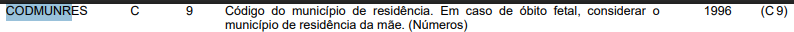

In [61]:
df['CODMUNRES']

9          431490
102        420540
160        330455
184        430420
185        432260
            ...  
1465530    316050
1465589    160015
1465595    130140
1465603    130140
1465608    130140
Name: CODMUNRES, Length: 16259, dtype: int64

Como ja estamos com a base dos códigos de municípios salvas na memória,  
basta usar o mesmo código que usamos antes

Como estamos com a base de municípios ainda salva no df 'codigomun',  
basta usar o mesmo código que usamos antes

In [62]:
# df['CODMUNNATU'] = df['CODMUNNATU'].map(codigomun.set_index('Códigos')['Munícipio']) SIC
df['CODMUNRES'] = df['CODMUNRES'].map(codigomun.set_index('Códigos')['Munícipio']) # SIC
df['CODMUNRES']

C:\Users\Kaue Mandarino\AppData\Local\Temp\ipykernel_33920\3395139123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CODMUNRES'] = df['CODMUNRES'].map(codigomun.set_index('Códigos')['Munícipio']) # SIC


9                         Porto Alegre
102                      Florianópolis
160                     Rio de Janeiro
184                         Candelária
185                     Venâncio Aires
                      ...             
1465530    Santo Antônio do Rio Abaixo
1465589        Pedra Branca do Amapari
1465595                       Eirunepé
1465603                       Eirunepé
1465608                       Eirunepé
Name: CODMUNRES, Length: 16259, dtype: object

Após importarmos o **NumPy**, começou a aparecer o seguinte aviso:

> **A value is trying to be set on a copy of a slice from a DataFrame.**  
> Try using `.loc[row_indexer, col_indexer] = value` instead.

###  O que esse aviso significa?

Esse aviso **não é causado pelo NumPy em si**.  
Ele indica que o **pandas não tem certeza** se você está alterando:

- o **DataFrame original**, ou  
- apenas uma **cópia temporária (slice)** dele.

por isso em certo momento começamos a usar o funcao :loc acima


In [63]:
df.columns

Index(['DTOBITO', 'HORAOBITO', 'NATURAL', 'CODMUNNATU', 'DTNASC', 'IDADE',
       'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'ESC2010', 'SERIESCFAL', 'OCUP',
       'CODMUNRES', 'LOCOCOR', 'CODESTAB', 'CODMUNOCOR', 'IDADEMAE', 'ESCMAE',
       'ESCMAE2010', 'SERIESCMAE', 'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT',
       'GRAVIDEZ', 'SEMAGESTAC', 'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO',
       'TPMORTEOCO', 'OBITOGRAV', 'OBITOPUERP', 'ASSISTMED', 'EXAME',
       'CIRURGIA', 'NECROPSIA', 'LINHAA', 'LINHAB', 'LINHAC', 'LINHAD',
       'LINHAII', 'CAUSABAS', 'CB_PRE', 'COMUNSVOIM', 'DTATESTADO',
       'CIRCOBITO', 'ACIDTRAB', 'FONTE', 'NUMEROLOTE', 'DTINVESTIG',
       'DTCADASTRO', 'ATESTANTE', 'STCODIFICA', 'CODIFICADO', 'VERSAOSIST',
       'VERSAOSCB', 'FONTEINV', 'DTRECEBIM', 'ATESTADO', 'DTRECORIGA',
       'OPOR_DO', 'CAUSAMAT', 'ESCMAEAGR1', 'ESCFALAGR1', 'STDOEPIDEM',
       'STDONOVA', 'DIFDATA', 'NUDIASOBCO', 'DTCADINV', 'TPOBITOCOR',
       'DTCONINV', 'FONTES', 'TPRESGINFO', 'TPNIVELI

  
Indiferente para nosso estudo, então vamos dropar

In [64]:
drop('LOCOCOR')

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
9,2023-02-14,20:24:00,Rio Grande do Sul,Porto Alegre,1981-02-26,41,Feminino,Branca,Solteiro,Ignorado,...,NaN,M,NaN,NaN,NaN,NaN,X700,S,NaN,NaN


  
Indiferente para nosso estudo, então vamos dropar

In [65]:
drop('CODESTAB')

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
9,2023-02-14,20:24:00,Rio Grande do Sul,Porto Alegre,1981-02-26,41,Feminino,Branca,Solteiro,Ignorado,...,NaN,M,NaN,NaN,NaN,NaN,X700,S,NaN,NaN



Percebam que aqui se difere, do lugar aonde nasceu, e de aonde morreu, é aonde mora.

Terceira vez que estamos fazendo o de/para em cima dos códigos dos munícipios, então só fazer igual fizemos antes

In [66]:
# df['CODMUNNATU'] = df['CODMUNNATU'].map(codigomun.set_index('Códigos')['Munícipio']) SIC
df['CODMUNOCOR'] = df['CODMUNOCOR'].map(codigomun.set_index('Códigos')['Munícipio']) # SIC
df['CODMUNOCOR']

9                         Porto Alegre
102                      Florianópolis
160                     Rio de Janeiro
184                         Candelária
185                     Venâncio Aires
                      ...             
1465530    Santo Antônio do Rio Abaixo
1465589        Pedra Branca do Amapari
1465595                       Eirunepé
1465603                       Eirunepé
1465608                       Eirunepé
Name: CODMUNOCOR, Length: 16259, dtype: object

  
Esse aqui está meio incompleto, vamos supor que seja na data do óbito


In [67]:
df['IDADEMAE']

9         NaN
102       NaN
160       NaN
184       NaN
185       NaN
           ..
1465530   NaN
1465589   NaN
1465595   NaN
1465603   NaN
1465608   NaN
Name: IDADEMAE, Length: 16259, dtype: float64

In [68]:
df['IDADEMAE'].isna().sum()

16259

Como esta 100% em branco, vamos drops também

In [69]:
drop('IDADEMAE')

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
9,2023-02-14,20:24:00,Rio Grande do Sul,Porto Alegre,1981-02-26,41,Feminino,Branca,Solteiro,Ignorado,...,NaN,M,NaN,NaN,NaN,NaN,X700,S,NaN,NaN


In [70]:
df['OCUPMAE'].isna().sum()

16259

In [71]:
drop('OCUPMAE')
df.columns

Index(['DTOBITO', 'HORAOBITO', 'NATURAL', 'CODMUNNATU', 'DTNASC', 'IDADE',
       'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'ESC2010', 'SERIESCFAL', 'OCUP',
       'CODMUNRES', 'CODMUNOCOR', 'ESCMAE', 'ESCMAE2010', 'SERIESCMAE',
       'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ', 'SEMAGESTAC', 'GESTACAO',
       'PARTO', 'OBITOPARTO', 'PESO', 'TPMORTEOCO', 'OBITOGRAV', 'OBITOPUERP',
       'ASSISTMED', 'EXAME', 'CIRURGIA', 'NECROPSIA', 'LINHAA', 'LINHAB',
       'LINHAC', 'LINHAD', 'LINHAII', 'CAUSABAS', 'CB_PRE', 'COMUNSVOIM',
       'DTATESTADO', 'CIRCOBITO', 'ACIDTRAB', 'FONTE', 'NUMEROLOTE',
       'DTINVESTIG', 'DTCADASTRO', 'ATESTANTE', 'STCODIFICA', 'CODIFICADO',
       'VERSAOSIST', 'VERSAOSCB', 'FONTEINV', 'DTRECEBIM', 'ATESTADO',
       'DTRECORIGA', 'OPOR_DO', 'CAUSAMAT', 'ESCMAEAGR1', 'ESCFALAGR1',
       'STDOEPIDEM', 'STDONOVA', 'DIFDATA', 'NUDIASOBCO', 'DTCADINV',
       'TPOBITOCOR', 'DTCONINV', 'FONTES', 'TPRESGINFO', 'TPNIVELINV',
       'DTCADINF', 'MORTEPARTO', 'DTCONCASO', 'A

In [72]:
df['ESCMAE'].isna().sum()

16259

In [73]:
drop('ESCMAE')

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
9,2023-02-14,20:24:00,Rio Grande do Sul,Porto Alegre,1981-02-26,41,Feminino,Branca,Solteiro,Ignorado,...,NaN,M,NaN,NaN,NaN,NaN,X700,S,NaN,NaN


In [74]:
drop('ESCMAE2010')

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
9,2023-02-14,20:24:00,Rio Grande do Sul,Porto Alegre,1981-02-26,41,Feminino,Branca,Solteiro,Ignorado,...,NaN,M,NaN,NaN,NaN,NaN,X700,S,NaN,NaN


In [75]:
drop('SERIESCMAE')

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
9,2023-02-14,20:24:00,Rio Grande do Sul,Porto Alegre,1981-02-26,41,Feminino,Branca,Solteiro,Ignorado,...,NaN,M,NaN,NaN,NaN,NaN,X700,S,NaN,NaN


In [76]:
df.columns

Index(['DTOBITO', 'HORAOBITO', 'NATURAL', 'CODMUNNATU', 'DTNASC', 'IDADE',
       'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'ESC2010', 'SERIESCFAL', 'OCUP',
       'CODMUNRES', 'CODMUNOCOR', 'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ',
       'SEMAGESTAC', 'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'TPMORTEOCO',
       'OBITOGRAV', 'OBITOPUERP', 'ASSISTMED', 'EXAME', 'CIRURGIA',
       'NECROPSIA', 'LINHAA', 'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII',
       'CAUSABAS', 'CB_PRE', 'COMUNSVOIM', 'DTATESTADO', 'CIRCOBITO',
       'ACIDTRAB', 'FONTE', 'NUMEROLOTE', 'DTINVESTIG', 'DTCADASTRO',
       'ATESTANTE', 'STCODIFICA', 'CODIFICADO', 'VERSAOSIST', 'VERSAOSCB',
       'FONTEINV', 'DTRECEBIM', 'ATESTADO', 'DTRECORIGA', 'OPOR_DO',
       'CAUSAMAT', 'ESCMAEAGR1', 'ESCFALAGR1', 'STDOEPIDEM', 'STDONOVA',
       'DIFDATA', 'NUDIASOBCO', 'DTCADINV', 'TPOBITOCOR', 'DTCONINV', 'FONTES',
       'TPRESGINFO', 'TPNIVELINV', 'DTCADINF', 'MORTEPARTO', 'DTCONCASO',
       'ALTCAUSA', 'CAUSABAS_O', 'TPPOS', 'TP_A

Tive uma idéia, vou rodar um codigo que olha todas as colunas e quais forem 95% vazias ele excluirá,  
poupando assim nosso trabalho

In [77]:
print(df.columns[df.isna().mean() > 0.95].tolist()) # Conta os naN acima de 95% exibe quais são
df = df.loc[:, df.isna().mean() <= 0.95] # Subscreve o df sem ele


['QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ', 'SEMAGESTAC', 'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'EXAME', 'CIRURGIA', 'CB_PRE', 'ACIDTRAB', 'CAUSAMAT', 'ESCMAEAGR1', 'FONTES', 'TPRESGINFO', 'DTCADINF', 'MORTEPARTO', 'DTCONCASO', 'ALTCAUSA', 'TP_ALTERA', 'CB_ALT']


Excelente, 22 colunas dropadas de uma vez, nos poupou tempo

In [78]:
df.columns

Index(['DTOBITO', 'HORAOBITO', 'NATURAL', 'CODMUNNATU', 'DTNASC', 'IDADE',
       'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'ESC2010', 'SERIESCFAL', 'OCUP',
       'CODMUNRES', 'CODMUNOCOR', 'TPMORTEOCO', 'OBITOGRAV', 'OBITOPUERP',
       'ASSISTMED', 'NECROPSIA', 'LINHAA', 'LINHAB', 'LINHAC', 'LINHAD',
       'LINHAII', 'CAUSABAS', 'COMUNSVOIM', 'DTATESTADO', 'CIRCOBITO', 'FONTE',
       'NUMEROLOTE', 'DTINVESTIG', 'DTCADASTRO', 'ATESTANTE', 'STCODIFICA',
       'CODIFICADO', 'VERSAOSIST', 'VERSAOSCB', 'FONTEINV', 'DTRECEBIM',
       'ATESTADO', 'DTRECORIGA', 'OPOR_DO', 'ESCFALAGR1', 'STDOEPIDEM',
       'STDONOVA', 'DIFDATA', 'NUDIASOBCO', 'DTCADINV', 'TPOBITOCOR',
       'DTCONINV', 'TPNIVELINV', 'CAUSABAS_O', 'TPPOS'],
      dtype='object')

In [79]:
df.shape # Conta quantas linhas e colunas temos no df

(16259, 54)

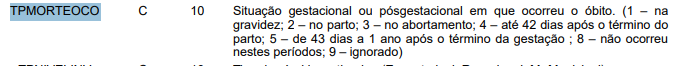  
Sem relação com o modelo

In [80]:
drop('TPMORTEOCO')

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,STDOEPIDEM,STDONOVA,DIFDATA,NUDIASOBCO,DTCADINV,TPOBITOCOR,DTCONINV,TPNIVELINV,CAUSABAS_O,TPPOS
9,2023-02-14,20:24:00,Rio Grande do Sul,Porto Alegre,1981-02-26,41,Feminino,Branca,Solteiro,Ignorado,...,0.0,1,20,37.0,23032023.0,9.0,23032023.0,M,X700,S


,  
Sem relação com o modelo, vamos remover

In [81]:
drop('OBITOGRAV')

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,STDOEPIDEM,STDONOVA,DIFDATA,NUDIASOBCO,DTCADINV,TPOBITOCOR,DTCONINV,TPNIVELINV,CAUSABAS_O,TPPOS
9,2023-02-14,20:24:00,Rio Grande do Sul,Porto Alegre,1981-02-26,41,Feminino,Branca,Solteiro,Ignorado,...,0.0,1,20,37.0,23032023.0,9.0,23032023.0,M,X700,S


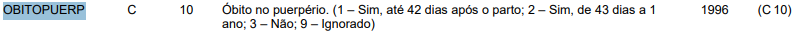  
Intuitivamente, este dado não indica forte relação com o modelo, mas também, não podemo,
simplismente supor que não tem, sem testar, por isto mantenho esta coluna

In [82]:
df.loc[:, 'OBITOPUERP'] = (
    df['OBITOPUERP']
    .map({
        1: 'Sim, até 42 dias após o parto',
        2: 'Sim, entre 43 dias e 365 dias após o parto',
        3: 'Não',
        9: 'Ignorado'
    })
)
df['OBITOPUERP'].head(10)

9      Não
102    Não
160    Não
184    NaN
185    NaN
338    NaN
351    NaN
353    NaN
378    NaN
412    NaN
Name: OBITOPUERP, dtype: object

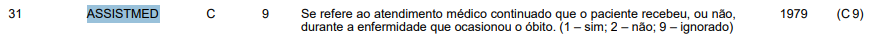

In [83]:
df['ASSISTMED'].value_counts() # Vamos dar uma olhada no preenchimento dos dados para ver se é relevante

ASSISTMED
2.0    9995
1.0    2420
9.0    1145
Name: count, dtype: int64

In [84]:
df.loc[:, 'ASSISTMED'] = (
    df['ASSISTMED']
    .map({
        1.0: 'sim',
        2.0: 'não',
        3.0: 'ignorado'
    })
)
df['ASSISTMED'].describe()

count     12415
unique        2
top         não
freq       9995
Name: ASSISTMED, dtype: object

In [85]:
df['ASSISTMED'].value_counts().head

<bound method NDFrame.head of ASSISTMED
não    9995
sim    2420
Name: count, dtype: int64>

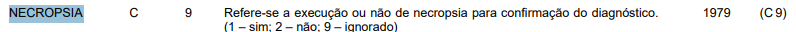,    
Sem relação com o modelo

In [86]:
drop('NECROPSIA')

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,STDOEPIDEM,STDONOVA,DIFDATA,NUDIASOBCO,DTCADINV,TPOBITOCOR,DTCONINV,TPNIVELINV,CAUSABAS_O,TPPOS
9,2023-02-14,20:24:00,Rio Grande do Sul,Porto Alegre,1981-02-26,41,Feminino,Branca,Solteiro,Ignorado,...,0.0,1,20,37.0,23032023.0,9.0,23032023.0,M,X700,S


In [87]:
df

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,STDOEPIDEM,STDONOVA,DIFDATA,NUDIASOBCO,DTCADINV,TPOBITOCOR,DTCONINV,TPNIVELINV,CAUSABAS_O,TPPOS
9,2023-02-14,20:24:00,Rio Grande do Sul,Porto Alegre,1981-02-26,41,Feminino,Branca,Solteiro,Ignorado,...,0.0,1,20,37.0,23032023.0,9.0,23032023.0,M,X700,S
102,2023-01-01,NaT,Santa Catarina,Florianópolis,1982-05-09,40,Feminino,Branca,Solteiro,12 anos ou mais,...,0.0,1,12,16.0,17012023.0,9.0,17012023.0,M,X804,S
160,2023-01-01,NaT,Estrangeiro,NaN,1990-11-29,32,Feminino,Branca,Solteiro,4 a 7 anos,...,0.0,1,528,23.0,25012023.0,9.0,24012023.0,M,X689,S
184,2023-01-01,NaT,Rio Grande do Sul,Sobradinho,1962-12-07,60,Masculino,Branca,Solteiro,4 a 7 anos,...,0.0,1,649,NaN,NaN,NaN,NaN,NaN,X804,N
185,2023-01-01,NaT,Rio Grande do Sul,Venâncio Aires,1991-01-15,31,Masculino,Branca,Solteiro,Ignorado,...,0.0,1,4,NaN,NaN,NaN,NaN,NaN,X704,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465530,2023-11-18,NaT,Minas Gerais,Santo Antônio do Rio Abaixo,1970-08-15,53,Masculino,Parda,Ignorado,Nenhuma,...,0.0,1,359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1465589,2023-09-27,20:00:00,Amapá,Pedra Branca do Amapari,2005-03-26,18,Masculino,Indígena,Ignorado,8 a 11 anos,...,0.0,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1465595,2023-11-01,19:00:00,Amazonas,Eirunepé,2011-01-01,12,Feminino,Indígena,Ignorado,Ignorado,...,0.0,1,213,96.0,21062024.0,9.0,5022024.0,E,NaN,NaN
1465603,2023-11-26,15:40:00,Amazonas,Eirunepé,2002-01-01,21,Feminino,Indígena,Ignorado,Nenhuma,...,0.0,1,187,71.0,21062024.0,9.0,5022024.0,E,NaN,NaN


In [ ]:
# Continua...

In [ ]:
opcao_original = pd.get_option('display.max_columns')

pd.set_option('display.max_columns', None)
df

#pd.set_option('display.max_columns', opcao_original)

In [89]:
df

,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,...,STDOEPIDEM,STDONOVA,DIFDATA,NUDIASOBCO,DTCADINV,TPOBITOCOR,DTCONINV,TPNIVELINV,CAUSABAS_O,TPPOS
9,2023-02-14,20:24:00,Rio Grande do Sul,Porto Alegre,1981-02-26,41,Feminino,Branca,Solteiro,Ignorado,...,0.0,1,20,37.0,23032023.0,9.0,23032023.0,M,X700,S
102,2023-01-01,NaT,Santa Catarina,Florianópolis,1982-05-09,40,Feminino,Branca,Solteiro,12 anos ou mais,...,0.0,1,12,16.0,17012023.0,9.0,17012023.0,M,X804,S
160,2023-01-01,NaT,Estrangeiro,NaN,1990-11-29,32,Feminino,Branca,Solteiro,4 a 7 anos,...,0.0,1,528,23.0,25012023.0,9.0,24012023.0,M,X689,S
184,2023-01-01,NaT,Rio Grande do Sul,Sobradinho,1962-12-07,60,Masculino,Branca,Solteiro,4 a 7 anos,...,0.0,1,649,NaN,NaN,NaN,NaN,NaN,X804,N
185,2023-01-01,NaT,Rio Grande do Sul,Venâncio Aires,1991-01-15,31,Masculino,Branca,Solteiro,Ignorado,...,0.0,1,4,NaN,NaN,NaN,NaN,NaN,X704,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465530,2023-11-18,NaT,Minas Gerais,Santo Antônio do Rio Abaixo,1970-08-15,53,Masculino,Parda,Ignorado,Nenhuma,...,0.0,1,359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1465589,2023-09-27,20:00:00,Amapá,Pedra Branca do Amapari,2005-03-26,18,Masculino,Indígena,Ignorado,8 a 11 anos,...,0.0,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1465595,2023-11-01,19:00:00,Amazonas,Eirunepé,2011-01-01,12,Feminino,Indígena,Ignorado,Ignorado,...,0.0,1,213,96.0,21062024.0,9.0,5022024.0,E,NaN,NaN
1465603,2023-11-26,15:40:00,Amazonas,Eirunepé,2002-01-01,21,Feminino,Indígena,Ignorado,Nenhuma,...,0.0,1,187,71.0,21062024.0,9.0,5022024.0,E,NaN,NaN


In [91]:
df.columns


Index(['DTOBITO', 'HORAOBITO', 'NATURAL', 'CODMUNNATU', 'DTNASC', 'IDADE',
       'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'ESC2010', 'SERIESCFAL', 'OCUP',
       'CODMUNRES', 'CODMUNOCOR', 'OBITOPUERP', 'ASSISTMED', 'LINHAA',
       'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII', 'CAUSABAS', 'COMUNSVOIM',
       'DTATESTADO', 'CIRCOBITO', 'FONTE', 'NUMEROLOTE', 'DTINVESTIG',
       'DTCADASTRO', 'ATESTANTE', 'STCODIFICA', 'CODIFICADO', 'VERSAOSIST',
       'VERSAOSCB', 'FONTEINV', 'DTRECEBIM', 'ATESTADO', 'DTRECORIGA',
       'OPOR_DO', 'ESCFALAGR1', 'STDOEPIDEM', 'STDONOVA', 'DIFDATA',
       'NUDIASOBCO', 'DTCADINV', 'TPOBITOCOR', 'DTCONINV', 'TPNIVELINV',
       'CAUSABAS_O', 'TPPOS'],
      dtype='object')

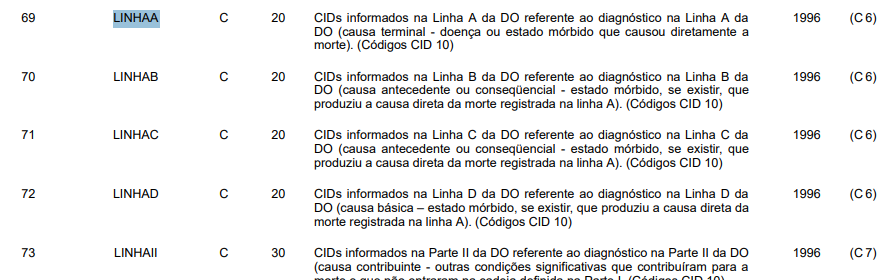

Pedi chatgpt para fazer o de-para (coniderei outras opções esta foi a mais fácil)

In [113]:
for valor, contagem in df['LINHAC'].value_counts().head(30).items():
    print(valor, contagem) # Exibindo as 30 que mais aparecem na coluna LINHAA


*X700 1001
*T71X 97
*X709 97
*X740 96
*X780 54
*X800 52
*X708 47
*X704 42
*T07X 41
*X720 36
*X640 36
*X680 34
*X849 32
*X760 31
*X749 31
*X804 26
*X769 24
*X690 22
*X809 22
*X649 21
*X789 19
*X610 19
*S069 18
*X840 18
*F329 17
*X707 16
*X689 16
*S129 15
*S199 14
*X748 14


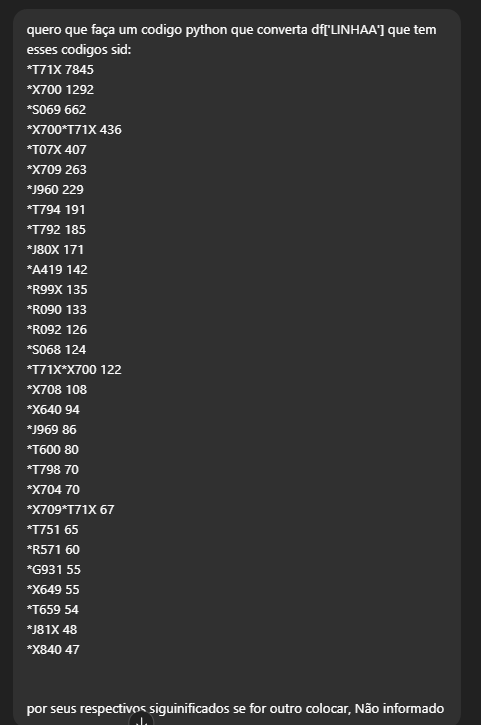

In [115]:
import re

# Exemplo de dicionário SID/CID → significado
mapa_sid = {
    # ASFIXIA / SUFOCAÇÃO
    "T71": "Asfixia",
    
    # TRAUMAS
    "T07": "Traumatismos múltiplos não especificados",
    "T79": "Complicações precoces de traumatismo",
    "T75": "Efeitos de outras causas externas",
    "S06": "Traumatismo intracraniano",
    "S12": "Fratura do pescoço",
    "S19": "Outros traumatismos do pescoço",

    # RESPIRATÓRIO / SISTÊMICO
    "J80": "Síndrome do desconforto respiratório agudo",
    "J81": "Edema pulmonar",
    "J96": "Insuficiência respiratória",
    "J18": "Pneumonia por microorganismo não especificado",
    "A41": "Sepse",

    # CAUSAS MAL DEFINIDAS
    "R99": "Outras causas mal definidas de mortalidade",
    "R09": "Outros sintomas e sinais respiratórios e circulatórios",
    "R57": "Choque",

    # NEUROLÓGICO
    "G93": "Outros transtornos do encéfalo",

    # TÓXICOS
    "T60": "Efeito tóxico de pesticidas",

    # AUTOEXTERMÍNIO – ENFORCAMENTO / SUFOCAÇÃO
    "X70": "Lesão autoprovocada por enforcamento, estrangulamento ou sufocação",
    "X71": "Lesão autoprovocada por afogamento",
    "X72": "Lesão autoprovocada por disparo de arma de fogo",
    "X73": "Lesão autoprovocada por disparo de arma de fogo",
    "X74": "Lesão autoprovocada por disparo de arma de fogo",

    # OBJETOS CORTANTES / CONTUNDENTES
    "X78": "Lesão autoprovocada por objeto cortante",
    "X79": "Lesão autoprovocada por objeto contundente",

    # SALTO / QUEDA
    "X80": "Lesão autoprovocada por salto de lugar elevado",
    "X82": "Lesão autoprovocada por colisão de veículo a motor",

    # OUTROS MÉTODOS
    "X84": "Lesão autoprovocada por meios não especificados",

    # INTOXICAÇÃO
    "X60": "Autointoxicação por drogas e medicamentos",
    "X61": "Autointoxicação por drogas e medicamentos",
    "X64": "Autointoxicação por drogas e medicamentos",
    "X68": "Autointoxicação por pesticidas",
    "X69": "Autointoxicação por outras substâncias químicas",

    # VARIAÇÕES / SUBCATEGORIAS
    "X70": "Lesão autoprovocada por enforcamento, estrangulamento ou sufocação",
    "X71": "Lesão autoprovocada por afogamento",
    "X72": "Lesão autoprovocada por arma de fogo",
    "X74": "Lesão autoprovocada por arma de fogo",
    "X78": "Lesão autoprovocada por objeto cortante",
    "X80": "Lesão autoprovocada por salto",
    "X84": "Lesão autoprovocada por meios não especificados"
}

def traduzir_linha(valor):
    if pd.isna(valor):
        return "Não informado"

    # extrai códigos como X700, T71X, etc
    codigos = re.findall(r"[A-Z]\d{2}", valor)

    significados = []
    for cod in codigos:
        significados.append(mapa_sid.get(cod, "Não informado"))

    # remove duplicados
    significados = list(set(significados))

    return " | ".join(significados) if significados else "Não informado"


# Aplicação no DataFrame
df["LINHAA_DESC"] = df["LINHAA"].apply(traduzir_linhaa)


In [116]:
df['LINHAA_DESC'] = df['LINHAA'].apply(traduzir_linha)
df['LINHAB_DESC'] = df['LINHAB'].apply(traduzir_linha)
df['LINHAC_DESC'] = df['LINHAC'].apply(traduzir_linha)
df['LINHAD_DESC'] = df['LINHAD'].apply(traduzir_linha)
df['LINHAII_DESC'] = df['LINHAII'].apply(traduzir_linha)

In [117]:
df['LINHAA_DESC'].head(10)

9                                   Não informado
102      Traumatismos múltiplos não especificados
160                                 Não informado
184                 Lesão autoprovocada por salto
185                                       Asfixia
338                                       Asfixia
351                                       Asfixia
353                                       Asfixia
378    Não informado | Insuficiência respiratória
412                                       Asfixia
Name: LINHAA_DESC, dtype: object

In [ ]:
df['LINHAB_DESC'].head(10)

9                                              Não informado
102                            Lesão autoprovocada por salto
160                                            Não informado
184                                            Não informado
185                                            Não informado
                                 ...                        
1465530    Lesão autoprovocada por enforcamento, estrangu...
1465589    Lesão autoprovocada por enforcamento, estrangu...
1465595                                        Não informado
1465603                                        Não informado
1465608                                        Não informado
Name: LINHAB_DESC, Length: 16259, dtype: object

In [119]:
df['LINHAC_DESC'].head(10)

9                                          Não informado
102                                        Não informado
160                          Efeito tóxico de pesticidas
184                                        Não informado
185                                        Não informado
338    Lesão autoprovocada por enforcamento, estrangu...
351                                        Não informado
353                                        Não informado
378                                        Não informado
412                                        Não informado
Name: LINHAC_DESC, dtype: object

In [120]:
df['LINHAD_DESC'].head(10)

9      Lesão autoprovocada por enforcamento, estrangu...
102                                        Não informado
160                       Autointoxicação por pesticidas
184                                        Não informado
185    Lesão autoprovocada por enforcamento, estrangu...
338                                        Não informado
351                                        Não informado
353                                        Não informado
378                                        Não informado
412                                        Não informado
Name: LINHAD_DESC, dtype: object

In [121]:
df['LINHAII_DESC'].head(10)

9      Não informado
102    Não informado
160    Não informado
184    Não informado
185    Não informado
338    Não informado
351    Não informado
353    Não informado
378    Não informado
412    Não informado
Name: LINHAII_DESC, dtype: object

In [122]:
df.columns

Index(['DTOBITO', 'HORAOBITO', 'NATURAL', 'CODMUNNATU', 'DTNASC', 'IDADE',
       'SEXO', 'RACACOR', 'ESTCIV', 'ESC', 'ESC2010', 'SERIESCFAL', 'OCUP',
       'CODMUNRES', 'CODMUNOCOR', 'OBITOPUERP', 'ASSISTMED', 'LINHAA',
       'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII', 'CAUSABAS', 'COMUNSVOIM',
       'DTATESTADO', 'CIRCOBITO', 'FONTE', 'NUMEROLOTE', 'DTINVESTIG',
       'DTCADASTRO', 'ATESTANTE', 'STCODIFICA', 'CODIFICADO', 'VERSAOSIST',
       'VERSAOSCB', 'FONTEINV', 'DTRECEBIM', 'ATESTADO', 'DTRECORIGA',
       'OPOR_DO', 'ESCFALAGR1', 'STDOEPIDEM', 'STDONOVA', 'DIFDATA',
       'NUDIASOBCO', 'DTCADINV', 'TPOBITOCOR', 'DTCONINV', 'TPNIVELINV',
       'CAUSABAS_O', 'TPPOS', 'LINHAA_DESC', 'LINHAB_DESC', 'LINHAC_DESC',
       'LINHAD_DESC', 'LINHAII_DESC'],
      dtype='object')